### Title: 
# Logistic Regression & Gradient Descent in Python

### Description:
Program the gradient descent in Python based on the data file provided in class. Explain the notebook with the maximum degree of detail to work on understanding the algorithm.

### Author:
#### Jose Lopez Galdon

### Date:
13/11/2020

***

### Importación de librerías y carga de datos

Para este ejercicio solo necesitaremos cargar las librerías Numpy, Pandas y Matplotlib:

In [1]:
    # Importamos numpy y pandas para trabajar con el DF
import numpy as np
import pandas as pd

    # Importamos las librerías para hacer los plots
import matplotlib.pyplot as plt
%matplotlib inline

En segundo lugar, cargamos la base de datos:

In [2]:
data = pd.read_csv('../data/01_raw/4_1_data.csv')

A continuación, observaremos el dataset:

In [3]:
    # Primeras filas del dataset
data.head(10)

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [4]:
    # Últimas filas
data.tail(10)

,score-1,score-2,label
90,94.094331,77.159105,1
91,90.448551,87.508792,1
92,55.482161,35.570703,0
93,74.492692,84.845137,1
94,89.845807,45.358284,1
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [5]:
    # Información de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score-1  100 non-null    float64
 1   score-2  100 non-null    float64
 2   label    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
    # Descripción de los estadísticos principales
data.describe()

,score-1,score-2,label
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


***

### Regresión logística

La **función logística**, **curva logística** o **curva en forma de S** es una función matemática que aparece en diversos modelos de crecimiento de poblaciones, propagación de enfermedades epidémicas y difusión en redes sociales. Dicha función constituye un refinamiento del modelo exponencial para el crecimiento de una magnitud. Modela la función sigmoidea de crecimiento de un conjunto *P*.

Dada $x$ e $y$ calcular $\hat{y}$ siendo $\hat{y} =  P(y = 1 | x)$ donde $0 \leq \hat{y} \leq 1$

Para ello, deberemos calcular $w \in \mathbb{R}^n$ y $b \in \mathbb{R}$ 
donde $\hat{y} = \sigma(w^Tx + b) = \sigma(z) \approx y$ , es decir,
$\sigma(z) = \frac{1}{1 + e^{-z}}$

A continuación, realizaremos un gráfico con la función logística:

In [7]:
    # Definimos una función para calcular una sigmoide o regresión logística
def reg_log (x):
        '''
        Función de cálculo regresión logística o sigmoide.
        Dada x (una secuencia de datos), calcula la sigmoide
        '''
        return 1 / (1 + np.exp(-x))

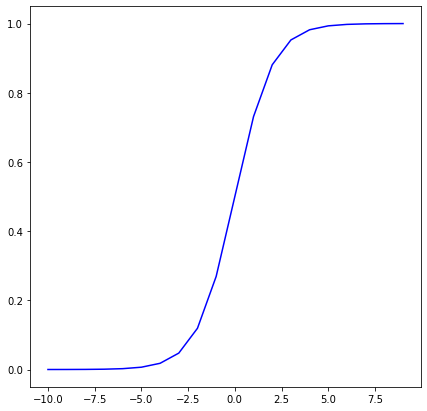

In [8]:
    # Realizamos el gráfico con la función plot de matplotlib
        
        # En primer lugar, nos generamos un array de -10 hasta 10 con salto de uno en uno
x = np.arange(-10, 10, 1)
        
        # Delimitamos el espacio de nuestro gráfico
f, ax = plt.subplots(figsize = (7, 7))

        # Dibujamos el gráfico
ax.plot(x, reg_log(x), color = 'blue');

El concepto es el siguiente:

Si *x* is muy grande $\sigma(x) \approx 1$, mientras que si *x* es un número muy pequeño $\sigma(z) \approx 0$

***

### Función de pérdida (error)

Como $\hat{y} \approx y$, tenemos una périda o error:

La función de coste para la regresión logística es la siguiente:

$$\ell(y, \hat{y}) = -(ylog(\hat{y}) + (1 - y)log(1 - \hat{y})$$

¿Por qué está función?

Si $y = 0$ queremos $\hat{y}$ pequeño, mientras que si $y = 1$ querremos un valor alto para $\hat{y}$.
Dicho con otras palabras, queremos penalizar el resultado.

***

### Función de coste

La función de coste agrega el resultado de la función de pérdida para cada $(x_{i}, y_{i})$. 

Dado *n*, el tamaño de la muestra, la función de coste es:

$$\jmath(w, b) = \frac{1}{n}\sum_{1}^{n}\ell(y^{i} \hat{y}^{i}) = -\frac{1}{n}\sum_{1}^{n}((y^{i}log(\hat{y}^{i}) + (y^{i} +1)log(1 - \hat{y}^{i}))$$

donde el gradiente de la función de coste es:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{n} \sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

Recordemos que: 

$\hat{y} = h_{\theta} = \sigma(w^Tx + b)$ 

$\frac{1}{n}$ obtiene el error medio

Una vez tenemos explicada la teoría, defineremos una función para calcular la función de coste:

In [9]:
def fun_coste (theta, x, y):
    '''
    Calculo de la función de coste y gradiente de la función:
    theta = parámetros del modelo
    x = vector de x
    y = vector de y
    '''
    n = len(y)                                                  # n es el tamaño de y, lo usaremos para el -(1/N)
    y_hat = reg_log(np.dot(x , theta))                          # y_hat = sigma(h0 * x)
    error = (y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat)) # error = todo lo que está después del sumatorio
    cost = -1 / n * sum(error)                                  # cost = la aplicación de toda la fórmula -(1/n)*sumatorio(error)
    gradient = 1 / n * np.dot(x.transpose(), (y_hat - y))       # gradient = (y_hat - y) * t(x)
    return cost[0] , gradient

Para trabajar más comodamente definimos dos objetos con los datos que vamos a trabajar:

In [10]:
    # Por un lado tenemos las puntuaciones (score-1 & score-2)
puntuaciones = data[['score-1', 'score-2']].values
puntuaciones

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [11]:
    # Por otro lado tenemos los resultado o label
resultados = data['label'].values
resultados

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Lo siguiente será estandarizar nuestros datos, recordemos que la fórmula de la estandarización es la siguiente:
$$x' = \frac{x - mean(x)}{\sigma}$$

In [12]:
    # Calculamos la media
media = np.mean(puntuaciones, axis = 0)

    # Calculamos la desviación
desviacion = np.std(puntuaciones, axis = 0)

    # Realizamos el cálculo
puntuaciones = (puntuaciones - media) / desviacion
puntuaciones

array([[-1.60224763,  0.63834112],
       [-1.82625564, -1.2075414 ],
       [-1.53903969,  0.3612943 ],
       [-0.28210129,  1.0863683 ],
       [ 0.69152826,  0.49337794],
       [-1.06199728, -0.5357394 ],
       [-0.23437234,  1.63818413],
       [ 0.4845113 , -1.06373024],
       [ 0.53998666,  1.14651105],
       [ 0.97044832, -1.22709853],
       [ 1.56075461, -1.51418452],
       [ 0.48393864, -1.92641626],
       [ 0.86065022,  0.55490359],
       [ 0.1921582 ,  1.70347834],
       [-1.34839922,  0.53082781],
       [-0.60293429,  1.24314792],
       [ 0.17694982, -0.72913975],
       [ 0.11893077, -1.05699346],
       [ 0.25914553,  1.44433023],
       [ 0.58543944, -1.00845873],
       [ 0.0892403 , -1.26468472],
       [ 1.2413042 , -0.02285779],
       [-0.78042096, -0.93923898],
       [-1.62350714, -1.19053019],
       [ 0.63426559,  0.14875155],
       [-0.17423248,  0.20186768],
       [ 0.75131151, -1.15742514],
       [ 1.41886056, -1.4830648 ],
       [-0.19700066,

Definimos los parámetros *x* e *y* que vamos a utilizar en nuestras funciones:

In [13]:
    # Sacamos el número de columnas y filas para usarlo a continuación
filas = puntuaciones.shape[0]
columnas = puntuaciones.shape[1]

    # Llamamos x a las puntuaciones añadiendo una columna de 1 como término independiente
x = np.append(np.ones((filas, 1)), puntuaciones, axis=1)
x    

array([[ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ],
       [ 1.        , -0.28210129,  1.0863683 ],
       [ 1.        ,  0.69152826,  0.49337794],
       [ 1.        , -1.06199728, -0.5357394 ],
       [ 1.        , -0.23437234,  1.63818413],
       [ 1.        ,  0.4845113 , -1.06373024],
       [ 1.        ,  0.53998666,  1.14651105],
       [ 1.        ,  0.97044832, -1.22709853],
       [ 1.        ,  1.56075461, -1.51418452],
       [ 1.        ,  0.48393864, -1.92641626],
       [ 1.        ,  0.86065022,  0.55490359],
       [ 1.        ,  0.1921582 ,  1.70347834],
       [ 1.        , -1.34839922,  0.53082781],
       [ 1.        , -0.60293429,  1.24314792],
       [ 1.        ,  0.17694982, -0.72913975],
       [ 1.        ,  0.11893077, -1.05699346],
       [ 1.        ,  0.25914553,  1.44433023],
       [ 1.        ,  0.58543944, -1.00845873],
       [ 1.        ,  0.0892403 , -1.264

In [14]:
    # Pasamos resultados a formato columna
y = resultados.reshape(filas, 1)
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [15]:
    # Añadimos los parámetros de theta
theta_inicial = np.zeros((columnas + 1, 1))
theta_inicial

array([[0.],
       [0.],
       [0.]])

In [16]:
    # Aplicamos nuestra función con los parámetros inicales
cost, gradient = fun_coste(theta_inicial, x, y)

    # Resultados
print("Coste en la inicialización", cost)
print("Gradiente en la inicialización:", gradient)

Coste en la inicialización 0.693147180559946
Gradiente en la inicialización: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


***

### Descenso del gradiente

El método del descenso del gradiente es un algoritmo de optimización que permite converger hacia el valor mínimo de una función mediante un proceso iterativo. En aprendizaje automático básicamente se utiliza para minimizar una función que mide el error de predicción del modelo en el conjunto de datos. A esta función de error se le suele denominar función de coste e identificar con $J(\theta)$, en donde $\theta$ hace referencia a los parámetros del modelo.

Para identificar el mínimo de la función el método del descenso del gradiente calcula la derivada parcial respecto a cada parámetro en el punto de evaluación. La derivada indica el valor y sentido en que se encuentra el mínimo más próximo. Este puede ser tanto un mínimo local como global, el método no los puede diferenciar. El resultado de la derivada se le resta a cada uno de los parámetros multiplicado por la velocidad de aprendizaje $\alpha$. La velocidad de aprendizaje generalmente tiene un valor entre 0 y 1 e indica lo rápido que converge el algoritmo. Es importante notar que es necesario seleccionar un valor adecuado. Un valor demasiado bajo puede provocar que nunca se alcance el mínimo. Por otro lado, un valor lo demasiado alto podría saltarse el mínimo.

El modo de funcionamiento básico del método del descenso del gradiente es:

1. Inicializar los parámetros $\theta$ a un valor de inicio
2. Indicar la velocidad de aprendizaje del algoritmo $\alpha$
3. Obtener la derivada de $J$ en el punto $\theta$
4. Sustraer la derivada por la velocidad de aprendizaje al valor actual del parámetro
5. Actualizar el valor de $\theta$ el nuevo valor
6. Comprobar el cambio en la actualización de los parámetros es inferior a un fijado previamente (llamada criterio de parada).
7. En caso afirmativo finalizar la ejecución, en caso contrario volver al punto 3.

#### Función descenso del gradiente

In [17]:
def fun_descenso_gradiente(x, y, theta, alpha, iterations):
    '''
    Cálculo del descenso del gradiente.
    x = variables explicativas estandrizadas con término independiente
    y = variable explicada
    theta = parámetros iniciales
    alpha = tasa de aprendizaje (tomara valores entre 0 y 1)
    interations = número de iteraciones
    '''
    costs = []                                     # Nos definimos el objeto costs en blanco
    for i in range(iterations):                    # Hacemos un loop con las iteraciones hasta que consiga converger utilizando
        cost, gradient = fun_coste(theta, x, y)    # la anterior (theta - = alpha * gradient)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [18]:
    # Aplicamos nuestra función
theta, costs = fun_descenso_gradiente(x, y, theta_inicial, 0.5, 1500)

In [19]:
print("Theta después del descenso del gradiente:", theta)
print("Coste:", costs[-1])

Theta después del descenso del gradiente: [[1.7109174 ]
 [3.976707  ]
 [3.70957598]]
Coste: 0.20349933047638538


***

### Plot

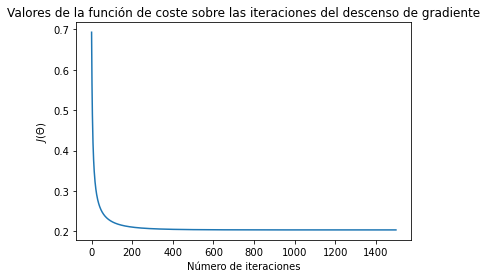

In [20]:
plt.plot(costs)
plt.xlabel("Número de iteraciones")
plt.ylabel("$J(\Theta)$")
plt.title("Valores de la función de coste sobre las iteraciones del descenso de gradiente");

Como podesmos observar a partir de la iteración 200 parece que ya cosigue el óptimo.

***

### Referencias

- Función logística. (s. f.). En Wikipedia, la enciclopedia libre. Recuperado 6 de noviembre de 2020, de https://es.wikipedia.org/wiki/Funci%C3%B3n_log%C3%ADstica

- Plotting a Sigmoid Function Using Python+matplotlib. (2014, 21 febrero). Recuperado de https://squall0032.tumblr.com/post/77300791096/plotting-a-sigmoid-function-using-python-matplotlib

- Singh, S. (s. f.). Linear and Logistic Regression with NumPy and Python. Recuperado de https://github.com/lmntrixsid/Linear-and-Logistic-Regression-with-NumPy-and-Python/blob/master/Logistic_Regression_Completed.ipynb